In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
folder="\AI_機率_1217"

In [7]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
pip install scikit-learn

     ---------------------------------------- 9.3/9.3 MB 2.6 MB/s eta 0:00:00
     -------------------------------------- 302.2/302.2 kB 2.7 MB/s eta 0:00:00
     ---------------------------------------- 44.1/44.1 MB 2.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
pip install matplotlib

     ---------------------------------------- 7.6/7.6 MB 2.3 MB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 3.5 MB/s eta 0:00:00
  Using cached Pillow-10.1.0-cp310-cp310-win_amd64.whl (2.6 MB)
     -------------------------------------- 186.7/186.7 kB 2.8 MB/s eta 0:00:00
     -------------------------------------- 103.1/103.1 kB 6.2 MB/s eta 0:00:00
     ---------------------------------------- 56.1/56.1 kB 1.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder


In [13]:
# 讀取資料
data = pd.read_csv('\GitHub\AI_機率_1217\data.csv')  # 請替換成您的資料檔案名稱或路徑


In [14]:
# 將站點名稱轉換成數字特徵 (使用 Label Encoding)
label_encoder = LabelEncoder()
data['站點名稱'] = label_encoder.fit_transform(data['站點名稱'])


In [15]:
data

,站點名稱,可借
0,2,0
1,0,6
2,4,2
3,1,12
4,3,13
...,...,...
475,2,0
476,0,5
477,4,2
478,1,10


In [16]:
# 將資料分為特徵值和目標值
X = data.drop('可借', axis=1)
y = data['可借']

In [ ]:
# y = y.astype(int)

In [17]:
# 初始化決策樹回歸模型
model = DecisionTreeRegressor(random_state=42)


In [18]:

# 訓練決策樹模型
model.fit(X, y)


DecisionTreeRegressor(random_state=42)

In [19]:
# 預測5個站點的可借車輛數機率
site_1 = label_encoder.transform(['E2'])  # 請替換成站點名稱
site_2 = label_encoder.transform(['E3'])  # 請替換成站點名稱
site_3 = label_encoder.transform(['E4'])  # 請替換成站點名稱
site_4 = label_encoder.transform(['E5'])  # 請替換成站點名稱
site_5 = label_encoder.transform(['E6'])  # 請替換成站點名稱

probabilities = model.predict([site_1, site_2, site_3, site_4, site_5])


c:\Users\jacky\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [25]:

# 獲取機率最高的站點
best_site_index = probabilities.argmax()
best_site_name = label_encoder.inverse_transform([best_site_index])[0]

print(f"預測站點1的可借車輛數機率：{probabilities[0]}")
print(f"預測站點2的可借車輛數機率：{probabilities[1]}")
print(f"預測站點3的可借車輛數機率：{probabilities[2]}")
print(f"預測站點4的可借車輛數機率：{probabilities[3]}")
print(f"預測站點5的可借車輛數機率：{probabilities[4]}")
print(f"最佳選擇的站點：{best_site_name}")


預測站點1的可借車輛數機率：5.177083333333333
預測站點2的可借車輛數機率：7.114583333333333
預測站點3的可借車輛數機率：1.71875
預測站點4的可借車輛數機率：5.34375
預測站點5的可借車輛數機率：1.3333333333333333
最佳選擇的站點：E3


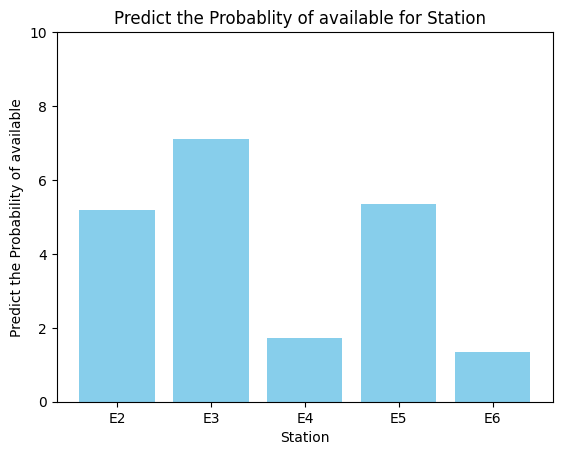

In [26]:
# 繪製機率圖
import matplotlib.pyplot as plt
sites = ['E2', 'E3', 'E4', 'E5', 'E6']
plt.bar(sites, probabilities, color='skyblue')
plt.xlabel('Station')  # 站點
plt.ylabel('Predict the Probability of available') # 預測可借車輛數機率
plt.title('Predict the Probablity of available for Station  ') # 5個站點可借車輛數機率預測
plt.ylim(0, 10)  # 調整 y 軸範圍
plt.show()